In [29]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(tibble)
library(ggpubr)
library(ggsci)
require("ggrepel")
library(stringr)
library(ggExtra)
library(ggh4x)

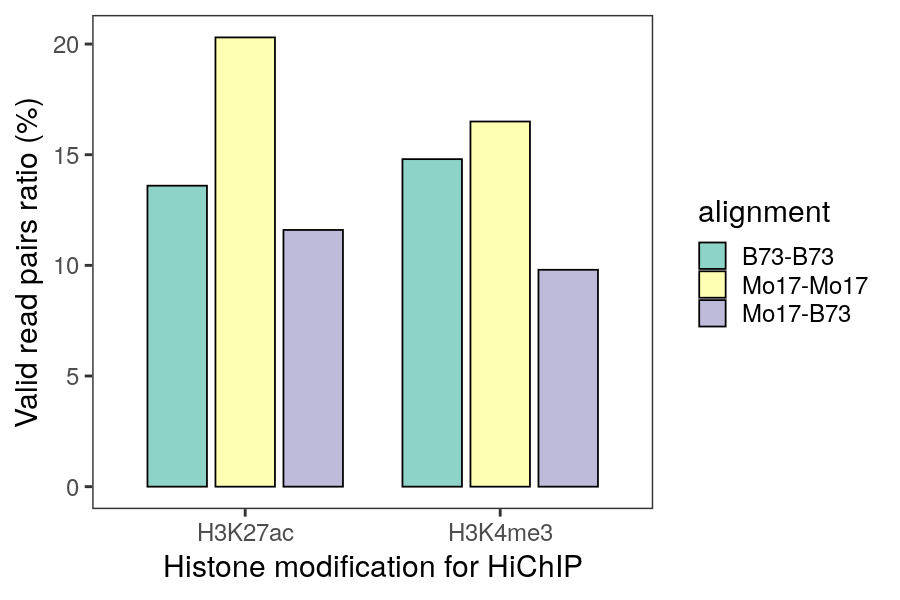

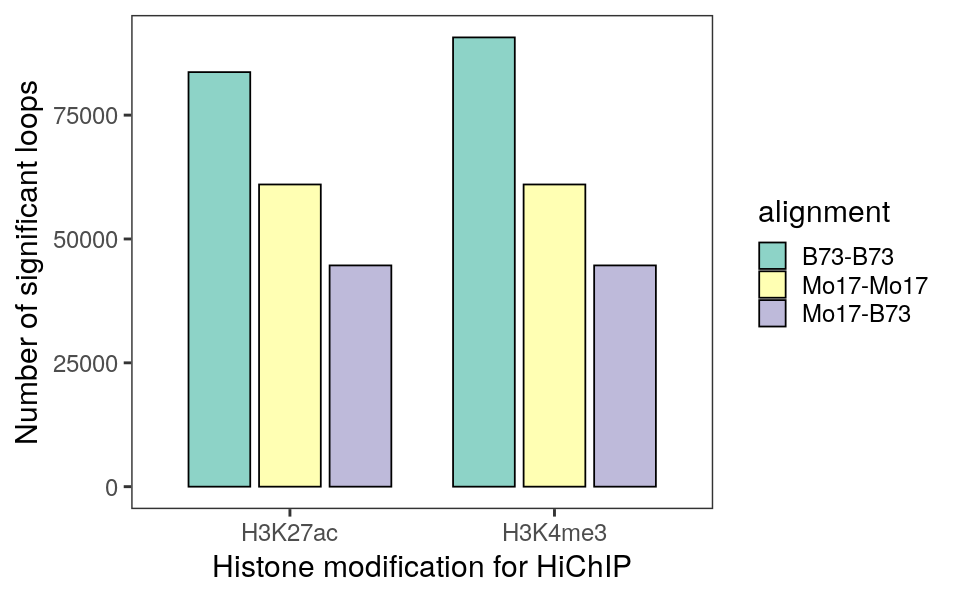

In [30]:
# Figure 1c-1d

# Figure 1c: valid pair ratio comparisons
options(repr.plot.width=7.5, repr.plot.height=5)
value = c(14.8,16.5,9.8,13.6,20.3,11.6)
anti = c(rep("H3K4me3",3),rep("H3K27ac",3))
alignment = c(rep(c("B73-B73","Mo17-Mo17","Mo17-B73"),2))
data = data.frame(cbind(anti, alignment, value))
data$value = as.numeric(as.character(data$value))
data$alignment = factor(data$alignment, levels=c("B73-B73","Mo17-Mo17","Mo17-B73"))
x1 = ggbarplot(data, "anti", "value", fill="alignment", palette = "Set3",
  position = position_dodge(0.8)) + theme_bw(base_size = 18)+
    theme(panel.grid.major=element_blank(),panel.grid.minor=element_blank(),
          plot.title = element_text(hjust = 0.5),
         strip.background = element_rect(fill="white")) + xlab("Histone modification for HiChIP") + 
    ylab("Valid read pairs ratio (%)")
x1

# Figure 1d: loop number comparisons
options(repr.plot.width=8, repr.plot.height=5)
value = c(90688,61002,44663,83682,61002,44663)
anti = c(rep("H3K4me3",3),rep("H3K27ac",3))
alignment = c(rep(c("B73-B73","Mo17-Mo17","Mo17-B73"),2))
data = data.frame(cbind(anti, alignment, value))
data$value = as.numeric(as.character(data$value))
data$alignment = factor(data$alignment, levels=c("B73-B73","Mo17-Mo17","Mo17-B73"))
x2 = ggbarplot(data, "anti", "value", fill="alignment", palette = "Set3",
  position = position_dodge(0.8)) + theme_bw(base_size = 18)+
    theme(panel.grid.major=element_blank(),panel.grid.minor=element_blank(),
          plot.title = element_text(hjust = 0.5),
         strip.background = element_rect(fill="white")) + xlab("Histone modification for HiChIP") + 
    ylab("Number of significant loops")
x2

Warning message:
"Removed 1004 rows containing missing values (geom_violin)."


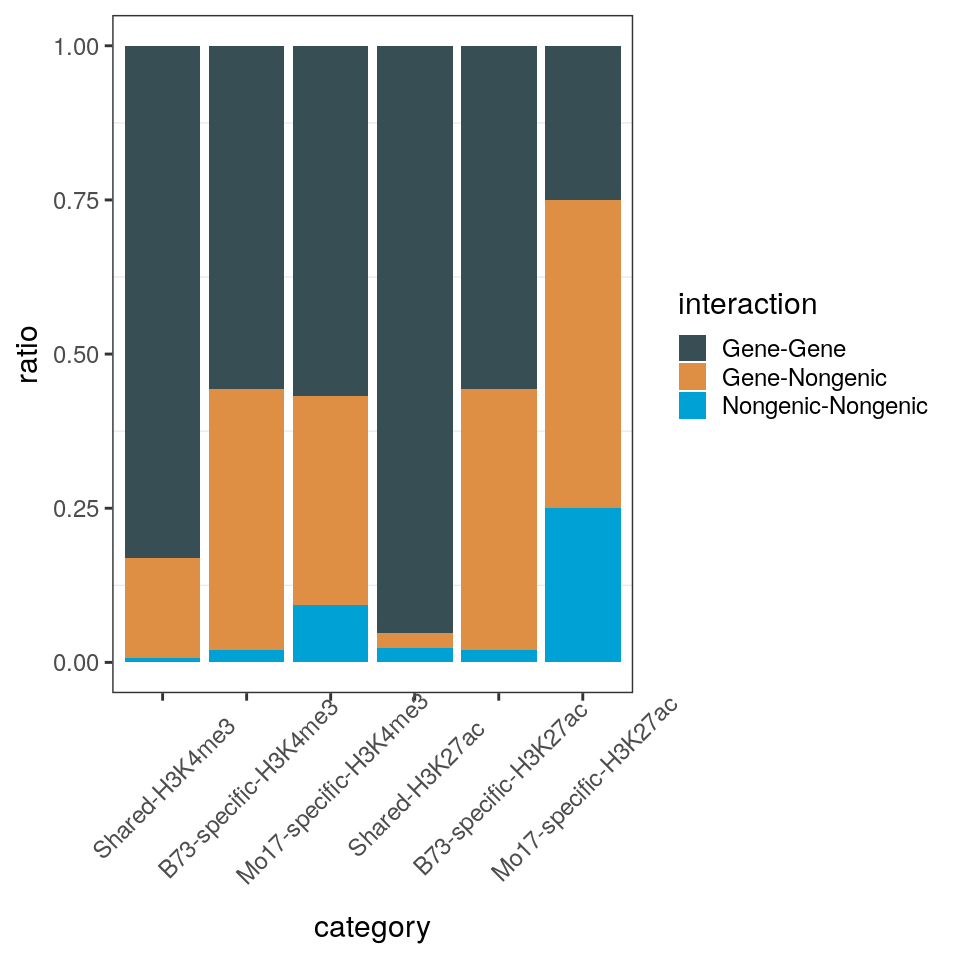

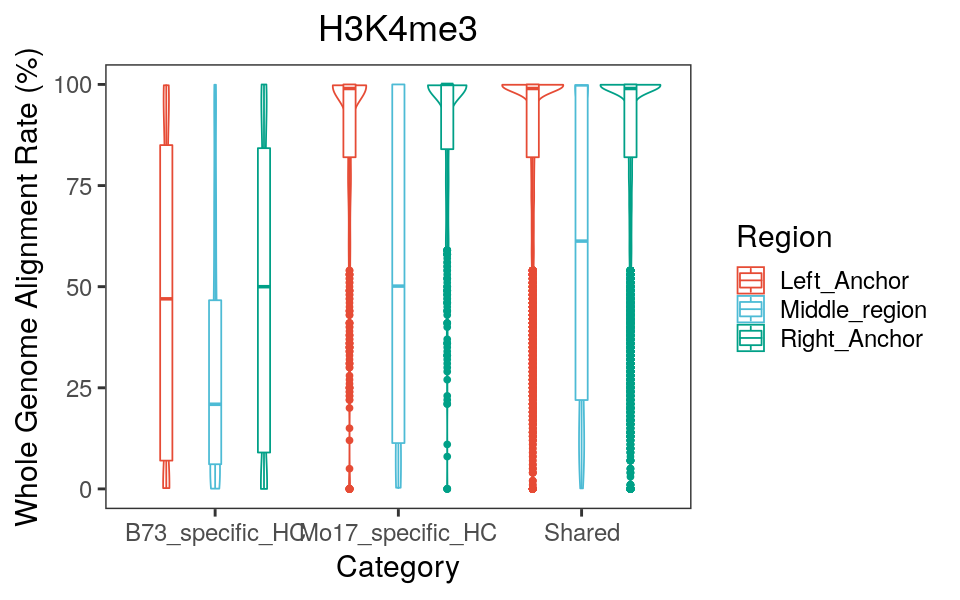

In [31]:
# Figure 2d-2e

# Figure 2d
value = c(1075,819,40,
         382,228,62,
         1075,819,40,
         3,6,3,
         19336,3784,167,
         16990,432,424)
category = c(rep("B73-specific-H3K4me3",3),
            rep("Mo17-specific-H3K4me3",3),
            rep("B73-specific-H3K27ac",3),
            rep("Mo17-specific-H3K27ac",3),
            rep("Shared-H3K4me3",3),
            rep("Shared-H3K27ac",3))
interaction = c(rep(c("Gene-Gene","Gene-Nongenic","Nongenic-Nongenic"),6))
data = data.frame(cbind(category, interaction, value))
data$value = as.numeric(as.character(data$value))
data1 = data %>% group_by(category) %>% mutate(ratio = value/sum(value)) %>% ungroup()
data1$category = factor(data1$category, levels=c("Shared-H3K4me3","B73-specific-H3K4me3","Mo17-specific-H3K4me3",
                                                "Shared-H3K27ac","B73-specific-H3K27ac", "Mo17-specific-H3K27ac"))
x = ggplot(data1, aes(fill=interaction, y=ratio, x=category)) + 
    geom_bar(position="fill", stat="identity") + theme_bw(base_size = 18)+scale_fill_jama()+
   theme(panel.grid.major=element_blank(),plot.title = element_text(hjust = 0.5),
         strip.background = element_rect(fill="white"),
         axis.text.x = element_text(angle = 45, vjust = 0.6, hjust=0.5))
options(repr.plot.width=8, repr.plot.height=8)
x

# Figure 2e

Bs_h3k4 = read.table("~/Documents/projects-in-Nathan-lab/HiChip/2021-HiChip-Analysis/2021NewAnalysis/Shared-Diffloop-B73-Mo17/highconfidence/alignmentrate/B73-Mo17-H3K4me3-diffloop-B73specific.highconfidence.alignmentrate.txt",sep='\t',head=F)
Ms_h3k4 = read.table("~/Documents/projects-in-Nathan-lab/HiChip/2021-HiChip-Analysis/2021NewAnalysis/Shared-Diffloop-B73-Mo17/highconfidence/alignmentrate/B73-Mo17-H3K4me3-diffloop-Mo17specific.highconfidence.alignmentrate.txt",sep='\t',head=F)
share_h3k4 = read.table("~/Documents/projects-in-Nathan-lab/HiChip/2021-HiChip-Analysis/2021NewAnalysis/Shared-Diffloop-B73-Mo17/highconfidence/alignmentrate/B73-to-Mo17-PtoA-H3K4me3-shared.alignmentrate.txt",sep='\t',head=F)
colnames(Bs_h3k4) = c("region","rate")
colnames(Ms_h3k4) = c("region","rate")
colnames(share_h3k4) = c("region","rate")
data1 = Bs_h3k4 %>% mutate(Category="B73_specific_HC", Region=ifelse(region=="left", "Left_Anchor",
                                                                       ifelse(region=='right', "Right_Anchor","Middle_region")))
data2 = Ms_h3k4 %>% mutate(Category="Mo17_specific_HC", Region=ifelse(region=="left", "Left_Anchor",
                                                                       ifelse(region=='right', "Right_Anchor","Middle_region")))
data3 = share_h3k4 %>% mutate(Category="Shared", Region=ifelse(region=="left", "Left_Anchor",
                                                                       ifelse(region=='right', "Right_Anchor","Middle_region")))
data = data.frame(rbind(data1, data2, data3))
options(repr.plot.width=8, repr.plot.height=5)
x = ggviolin(data, "Category", "rate", color = "Region",add = "boxplot",width = 1) + ylim(0,100) + 
    theme_bw(base_size = 18)+
    theme(panel.grid.major=element_blank(),panel.grid.minor=element_blank(),
          plot.title = element_text(hjust = 0.5),
         strip.background = element_rect(fill="white"))+
    scale_color_npg()+ylab("Whole Genome Alignment Rate (%)")+ggtitle("H3K4me3")
x

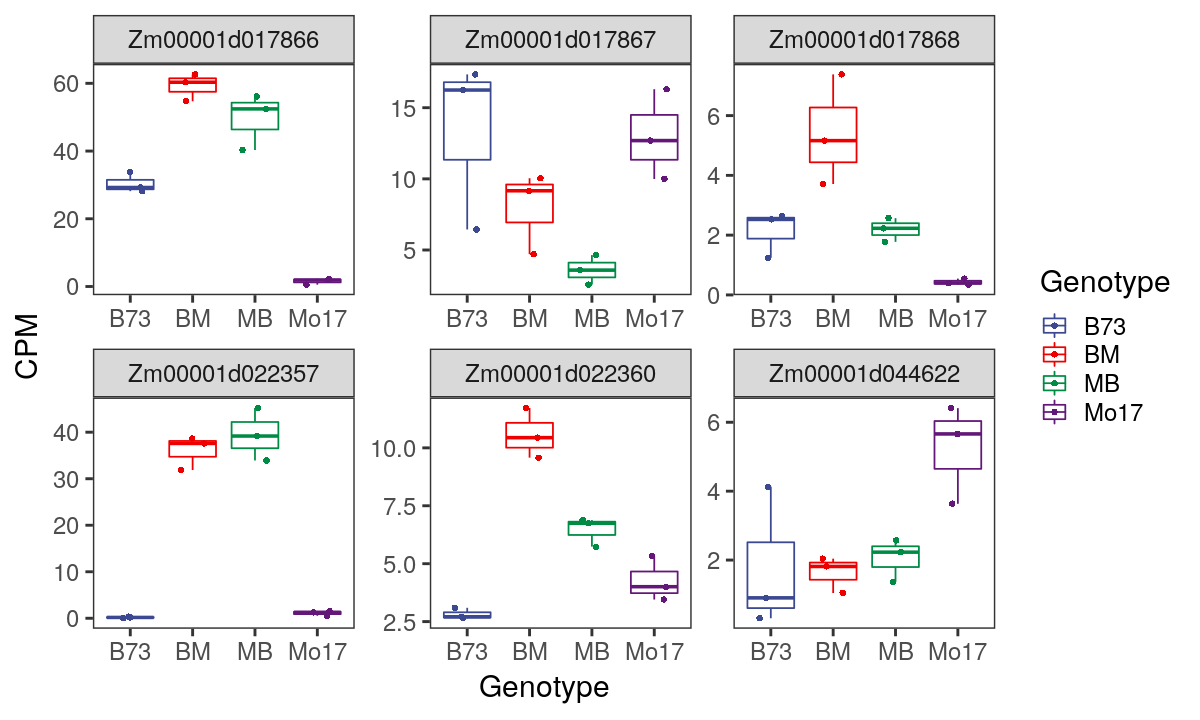

In [32]:
# Figure 3d
options(repr.plot.width=10, repr.plot.height=6)
genes = c("Zm00001d017866","Zm00001d017867","Zm00001d017868","Zm00001d022357","Zm00001d022360","Zm00001d044622")
e = read.table("../RNAseq/HiChip-RNAseq-2021Jun30-expressfpm.txt",head=T,check.names = F)
exp = e %>% rownames_to_column("Gene") %>% filter(Gene %in% genes) %>% select(-`MPV-rep1`,-`MPV-rep2`,-`MPV-rep3`) %>%
    gather(Sample, CPM, -Gene) %>% separate(Sample, c("Genotype", "Replicate"))
p <- ggplot(exp, aes(x=Genotype, y=CPM, color=Genotype)) + 
  geom_boxplot() + geom_jitter(shape=16, position=position_jitter(0.2)) + 
  facet_wrap(~Gene, scale="free") + scale_color_aaas() + theme_bw(base_size = 18) + 
    theme(panel.grid.major=element_blank(),panel.grid.minor=element_blank(),
          plot.title = element_text(hjust = 0.5))
p

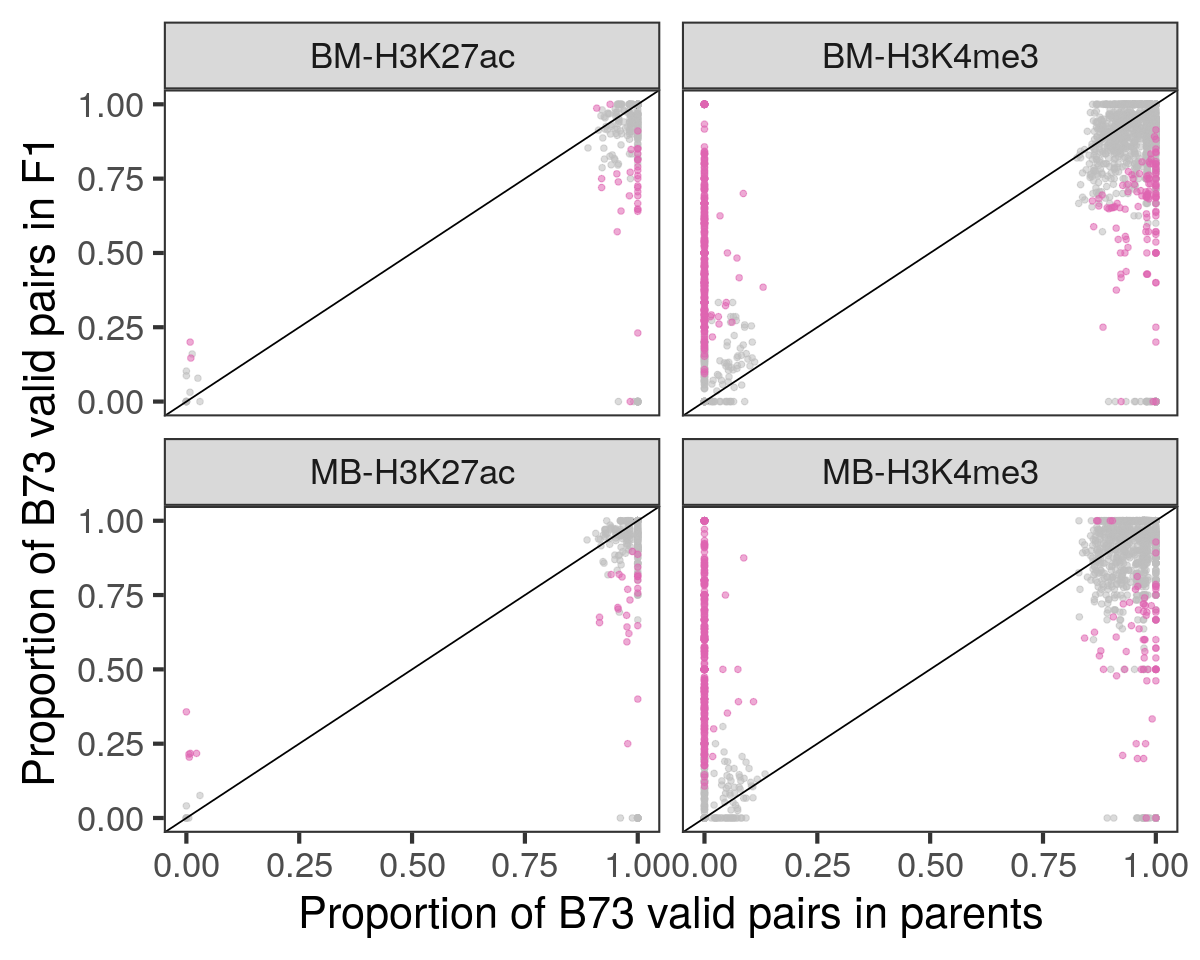

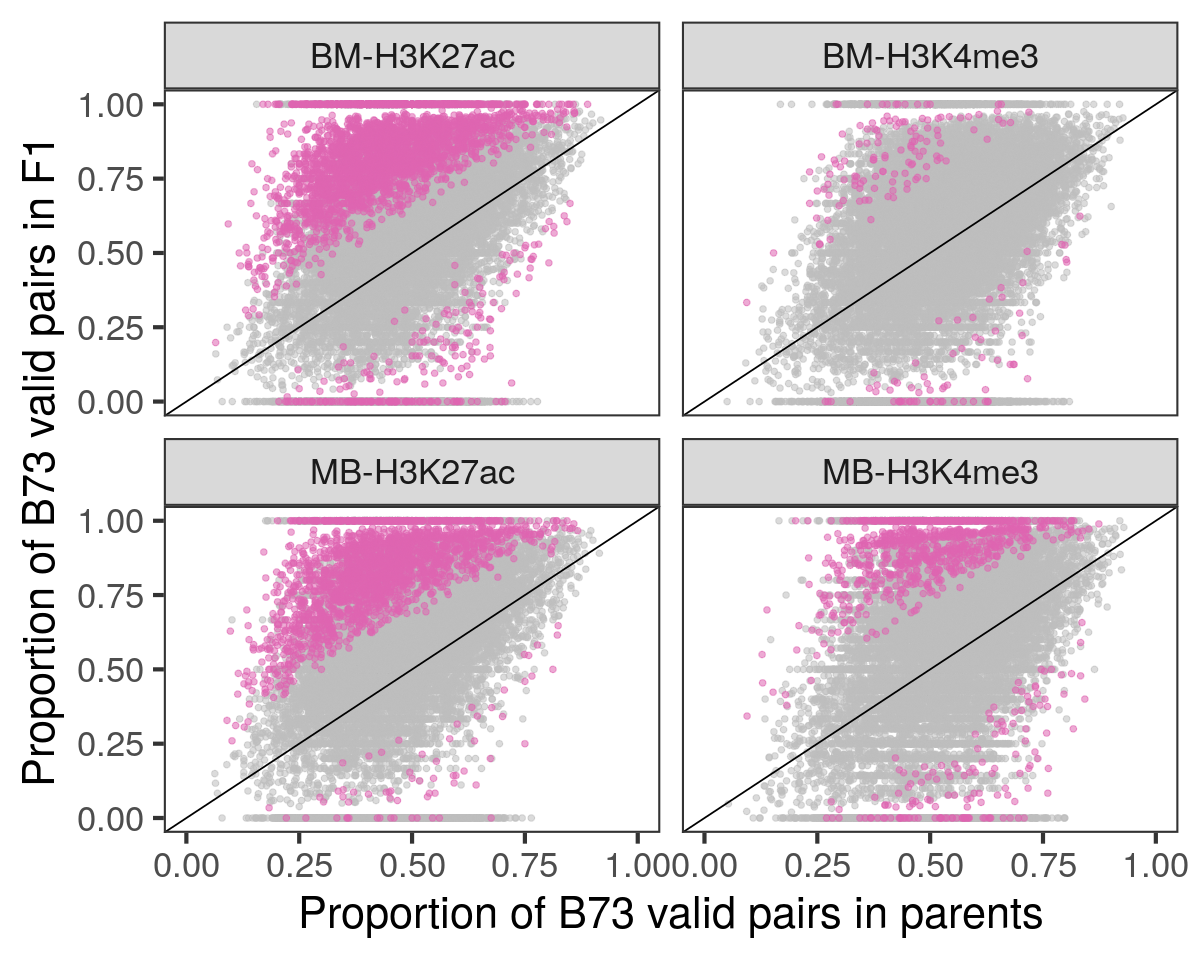

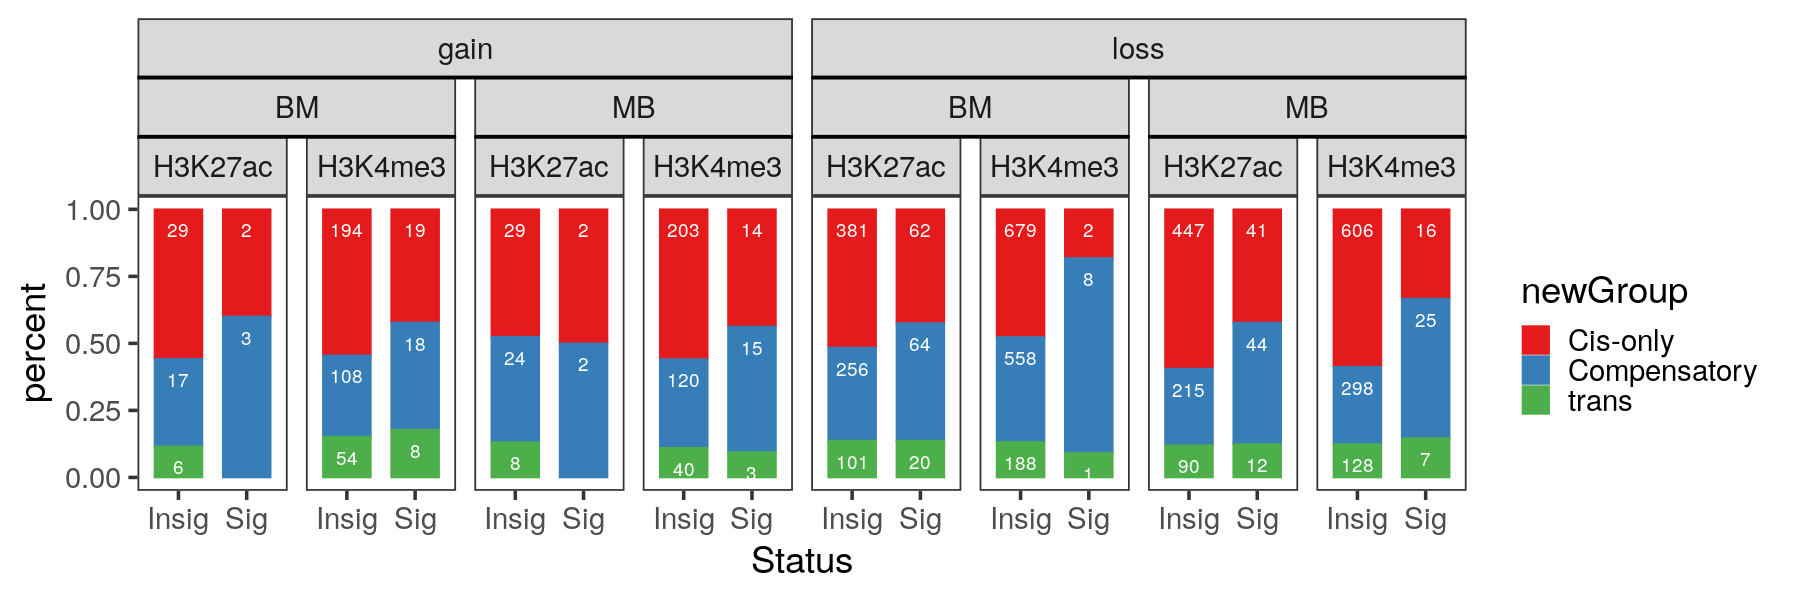

In [33]:
# Figure 4c-4e

# Figure 4c
options(repr.plot.width=10, repr.plot.height=8)
# plotting transacting loops
bmks = read.table("cistrans-on-diffshared/diff-share-0122/BMinbred-HCdiff-H3K27ac-count.0122.txt",sep='\t',head=F)
mbks = read.table("cistrans-on-diffshared/diff-share-0122/MBinbred-HCdiff-H3K27ac-count.0122.txt",sep='\t',head=F)
bmms = read.table("cistrans-on-diffshared/diff-share-0122/BMinbred-HCdiff-H3K4me3-count.0122.txt",sep='\t',head=F)
mbms = read.table("cistrans-on-diffshared/diff-share-0122/MBinbred-HCdiff-H3K4me3-count.0122.txt",sep='\t',head=F)
bmks1 = bmks %>% mutate(hybrid=ifelse((V2+V3) == 0, 0, V2/(V2+V3)),
                        inbred=ifelse((V4+V5) == 0, 0, V4/(V4+V5)), 
                        value=ifelse(V9 < 0.05, "Sig", "Insig"), lib="BM-H3K27ac") %>%
                        select(V1, hybrid, inbred, value, lib)
mbks1 = mbks %>% mutate(hybrid=ifelse((V2+V3) == 0, 0, V2/(V2+V3)),
                        inbred=ifelse((V4+V5) == 0, 0, V4/(V4+V5)), 
                        value=ifelse(V9 < 0.05, "Sig", "Insig"), lib="MB-H3K27ac") %>%
                        select(V1, hybrid, inbred, value, lib)
bmms1 = bmms %>% mutate(hybrid=ifelse((V2+V3) == 0, 0, V2/(V2+V3)),
                        inbred=ifelse((V4+V5) == 0, 0, V4/(V4+V5)), 
                        value=ifelse(V9 < 0.05, "Sig", "Insig"), lib="BM-H3K4me3") %>%
                        select(V1, hybrid, inbred, value, lib)
mbms1 = mbms %>% mutate(hybrid=ifelse((V2+V3) == 0, 0, V2/(V2+V3)),
                        inbred=ifelse((V4+V5) == 0, 0, V4/(V4+V5)), 
                        value=ifelse(V9 < 0.05, "Sig", "Insig"), lib="MB-H3K4me3") %>%
                        select(V1, hybrid, inbred, value, lib)
data1 = data.frame(rbind(bmks1, mbks1, bmms1, mbms1))
data1$value = factor(data1$value, levels=c("Insig","Sig"))

df_layer_1 <- data1[data1$value=="Insig",]
df_layer_2 <- data1[data1$value=="Sig",]
diff = ggplot() + 
    geom_point(
        data=df_layer_1,
        aes(x=inbred, y=hybrid, alpha= 0.2), 
        colour="#bdbdbd") +
    geom_point(
        data=df_layer_2, 
        aes(x=inbred, y=hybrid, alpha= 0.2), 
        colour="#df65b0")+
    theme_bw(base_size = 26) + 
    theme(panel.grid.major=element_blank(),panel.grid.minor=element_blank(),
          plot.title = element_text(hjust = 0.5),legend.position = "none") + geom_abline(intercept = 0, slope = 1) + 
    xlab("Proportion of B73 valid pairs in parents") + ylab("Proportion of B73 valid pairs in F1") + facet_wrap(~lib)
diff


# Figure 4d

bmks = read.table("cistrans-on-diffshared/diff-share-0122/BMinbred-shared-H3K27ac-count.0122.txt",sep='\t',head=F)
mbks = read.table("cistrans-on-diffshared/diff-share-0122/MBinbred-shared-H3K27ac-count.0122.txt",sep='\t',head=F)
bmms = read.table("cistrans-on-diffshared/diff-share-0122/BMinbred-shared-H3K4me3-count.0122.txt",sep='\t',head=F)
mbms = read.table("cistrans-on-diffshared/diff-share-0122/MBinbred-shared-H3K4me3-count.0122.txt",sep='\t',head=F)
bmks1 = bmks %>% mutate(hybrid=ifelse((V2+V3) == 0, 0, V2/(V2+V3)),
                        inbred=ifelse((V4+V5) == 0, 0, V4/(V4+V5)), 
                        value=ifelse(V9 < 0.05, "Sig", "Insig"), lib="BM-H3K27ac") %>% 
                        select(V1, hybrid, inbred, value, lib)
mbks1 = mbks %>% mutate(hybrid=ifelse((V2+V3) == 0, 0, V2/(V2+V3)),
                        inbred=ifelse((V4+V5) == 0, 0, V4/(V4+V5)), 
                        value=ifelse(V9 < 0.05, "Sig", "Insig"), lib="MB-H3K27ac") %>% 
                        select(V1, hybrid, inbred, value, lib)
bmms1 = bmms %>% mutate(hybrid=ifelse((V2+V3) == 0, 0, V2/(V2+V3)),
                        inbred=ifelse((V4+V5) == 0, 0, V4/(V4+V5)), 
                        value=ifelse(V9 < 0.05, "Sig", "Insig"), lib="BM-H3K4me3") %>% 
                        select(V1, hybrid, inbred, value, lib)
mbms1 = mbms %>% mutate(hybrid=ifelse((V2+V3) == 0, 0, V2/(V2+V3)),
                        inbred=ifelse((V4+V5) == 0, 0, V4/(V4+V5)), 
                        value=ifelse(V9 < 0.05, "Sig", "Insig"), lib="MB-H3K4me3") %>% 
                        select(V1, hybrid, inbred, value, lib)
data = data.frame(rbind(bmks1, mbks1, bmms1, mbms1))

df_layer_1 <- data[data$value=="Insig",]
df_layer_2 <- data[data$value=="Sig",]
shared = ggplot() + 
    geom_point(
        data=df_layer_1,
        aes(x=inbred, y=hybrid, alpha= 0.2), 
        colour="#bdbdbd") +
    geom_point(
        data=df_layer_2, 
        aes(x=inbred, y=hybrid, alpha= 0.2), 
        colour="#df65b0")+
    theme_bw(base_size = 26) + 
    theme(panel.grid.major=element_blank(),panel.grid.minor=element_blank(),
          plot.title = element_text(hjust = 0.5),legend.position = "none") + geom_abline(intercept = 0, slope = 1) + xlim(0,1)+
    xlab("Proportion of B73 valid pairs in parents") + ylab("Proportion of B73 valid pairs in F1") + facet_wrap(~lib)
shared

# Figure 4e
bm = read.table("cistrans-on-diffshared/geneoverlap/BM_classified_cistrans.txt",sep=' ',head=T)
mb = read.table("cistrans-on-diffshared/geneoverlap/MB_classified_cistrans.txt",sep=' ',head=T)
diff = read.table("cistrans-on-diffshared/geneoverlap/0122//HC-diff-cistransloop-2categories-0122.unique.txt")
colnames(diff) = c("Loop","Status","Gene")
share = read.table("cistrans-on-diffshared/geneoverlap/0122//Shared-cistransloop-2categories-0122.unique.txt")
colnames(share) = c("Loop","Status","Gene")
bmdiff_m = diff %>% separate(Loop, c("Geno","Mod")) %>% filter(Geno == 'BM', Mod == 'H3K4me3') %>% left_join(bm, by="Gene") %>% mutate(looptype='gain')
mbdiff_m = diff %>% separate(Loop, c("Geno","Mod")) %>% filter(Geno == 'MB', Mod == 'H3K4me3') %>% left_join(mb, by="Gene") %>% mutate(looptype='gain')
bmshare_m = share %>% separate(Loop, c("Geno","Mod")) %>% filter(Geno == 'BM', Mod == 'H3K4me3') %>% left_join(bm, by="Gene") %>% mutate(looptype='loss')
mbshare_m = share %>% separate(Loop, c("Geno","Mod")) %>% filter(Geno == 'MB', Mod == 'H3K4me3') %>% left_join(mb, by="Gene") %>% mutate(looptype='loss')

bmdiff_k = diff %>% separate(Loop, c("Geno","Mod")) %>% filter(Geno == 'BM', Mod == 'H3K27ac') %>% left_join(bm, by="Gene") %>% mutate(looptype='gain')
mbdiff_k = diff %>% separate(Loop, c("Geno","Mod")) %>% filter(Geno == 'MB', Mod == 'H3K27ac') %>% left_join(mb, by="Gene") %>% mutate(looptype='gain')
bmshare_k = share %>% separate(Loop, c("Geno","Mod")) %>% filter(Geno == 'BM', Mod == 'H3K27ac') %>% left_join(bm, by="Gene") %>% mutate(looptype='loss')
mbshare_k = share %>% separate(Loop, c("Geno","Mod")) %>% filter(Geno == 'MB', Mod == 'H3K27ac') %>% left_join(mb, by="Gene") %>% mutate(looptype='loss')

data = data.frame(rbind(bmdiff_m, mbdiff_m, bmshare_m, mbshare_m, 
                        bmdiff_k, mbdiff_k, bmshare_k, mbshare_k))
noncis = c("Cis+trans","Cisxtrans","trans-only")
data1 = data %>% drop_na() %>% select(Geno, Mod, Status, Category, looptype) %>% 
    filter(Category != 'Ambiguous', Category != 'Conserved') %>%
    mutate(newGroup = ifelse(Category %in% noncis, "trans", ifelse(
         Category == 'Compensatory', "Compensatory", "Cis-only"))) %>% 
    group_by(Geno, Mod, looptype, Status) %>% count(newGroup) %>% ungroup() %>% 
    group_by(Geno, Mod, looptype, Status) %>% mutate(percent = n/sum(n)) %>% ungroup()
options(repr.plot.width=15, repr.plot.height=5)
x = ggbarplot(data1, "Status", "percent",
  fill = "newGroup", color = "newGroup", palette = "Set1",
  label = data1$n, lab.col = "white", lab.pos = "in") +
  theme_bw(base_size = 22) + 
    theme(panel.grid.major=element_blank(),panel.grid.minor=element_blank(),
          plot.title = element_text(hjust = 0.5)) + 
    ggh4x::facet_nested(. ~ looptype + Geno + Mod, scales = "free", space = "free", nest_line = TRUE)
x

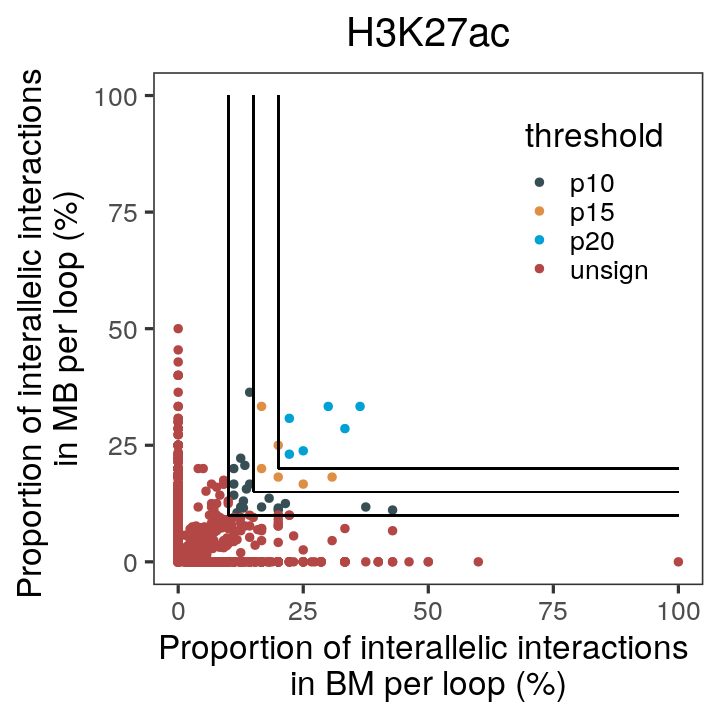

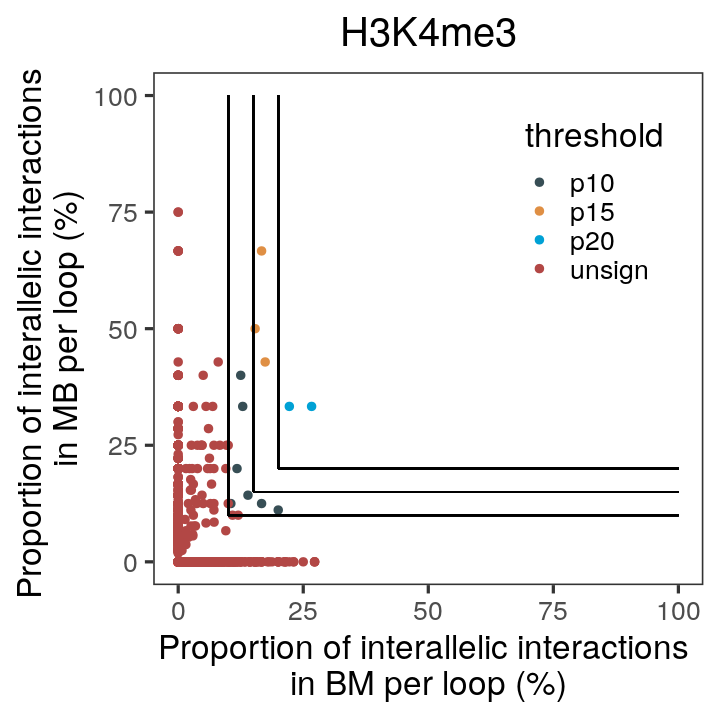

In [34]:
# Figure 5b-c

# transvection
kbm = read.table("../2021NewAnalysis/Transvection/organized/H3K27ac-BM-MB-union-PtoA.BMwithpair.organize.B73Mo17SNP.bed",sep=',',head=T)
kmb = read.table("../2021NewAnalysis/Transvection/organized/H3K27ac-BM-MB-union-PtoA.MBwithpair.organize.B73Mo17SNP.bed",sep=',',head=T)
kbm1 = kbm %>% filter(total >= 5) %>% mutate(mod = 'BM')
kmb1 = kmb %>% filter(total >= 5) %>% mutate(mod = 'MB')
datak_tmp = data.frame(rbind(kbm1, kmb1)) %>% filter(B73SNP < 0.05 & Mo17SNP < 0.05) %>% 
    select(loop, mod, trans.ratio) %>% spread(mod, trans.ratio) %>% drop_na() %>%
    mutate(threshold = ifelse(BM > 20 & MB > 20, "p20",
                            ifelse(BM > 15 & MB > 15, "p15",
                            ifelse(BM > 10 & MB > 10,"p10","unsign"))))

options(repr.plot.width=6, repr.plot.height=6)
x = ggscatter(datak_tmp, "BM", "MB", color="threshold") + theme_bw(base_size = 20) + 
    theme(panel.grid.major=element_blank(),panel.grid.minor=element_blank(),
          plot.title = element_text(hjust = 0.5)) + ggtitle("H3K27ac") + 
    geom_segment(aes(x = 10, y = 10, xend = 100, yend = 10)) + 
    geom_segment(aes(x = 10, y = 10, xend = 10, yend = 100)) +
    geom_segment(aes(x = 15, y = 15, xend = 15, yend = 100)) +
    geom_segment(aes(x = 15, y = 15, xend = 100, yend = 15)) +
    geom_segment(aes(x = 20, y = 20, xend = 20, yend = 100)) +
    geom_segment(aes(x = 20, y = 20, xend = 100, yend = 20)) +
    xlim(0,100) + ylim(0,100) + scale_color_jama() + xlab('Proportion of interallelic interactions \nin BM per loop (%)') +
    ylab('Proportion of interallelic interactions \nin MB per loop (%)') + theme(legend.position = c(0.8, 0.75))
x

kbm = read.table("../2021NewAnalysis/Transvection/organized/H3K4me3-BM-MB-union-PtoA.BMwithpair.organize.B73Mo17SNP.bed",sep=',',head=T)
kmb = read.table("../2021NewAnalysis/Transvection/organized/H3K4me3-BM-MB-union-PtoA.MBwithpair.organize.B73Mo17SNP.bed",sep=',',head=T)
kbm1 = kbm %>% filter(total >= 5) %>% mutate(mod = 'BM')
kmb1 = kmb %>% filter(total >= 5) %>% mutate(mod = 'MB')
datak_tmp = data.frame(rbind(kbm1, kmb1)) %>% filter(B73SNP < 0.05 & Mo17SNP < 0.05) %>% 
    select(loop, mod, trans.ratio) %>% spread(mod, trans.ratio) %>% drop_na() %>%
    mutate(threshold = ifelse(BM > 20 & MB > 20, "p20",
                            ifelse(BM > 15 & MB > 15, "p15",
                            ifelse(BM > 10 & MB > 10,"p10","unsign"))))

x = ggscatter(datak_tmp, "BM", "MB", color="threshold") + theme_bw(base_size = 20) + 
    theme(panel.grid.major=element_blank(),panel.grid.minor=element_blank(),
          plot.title = element_text(hjust = 0.5)) + ggtitle("H3K4me3") + 
    geom_segment(aes(x = 10, y = 10, xend = 100, yend = 10)) + 
    geom_segment(aes(x = 10, y = 10, xend = 10, yend = 100)) +
    geom_segment(aes(x = 15, y = 15, xend = 15, yend = 100)) +
    geom_segment(aes(x = 15, y = 15, xend = 100, yend = 15)) +
    geom_segment(aes(x = 20, y = 20, xend = 20, yend = 100)) +
    geom_segment(aes(x = 20, y = 20, xend = 100, yend = 20)) +
    xlim(0,100) + ylim(0,100) + scale_color_jama() + xlab('Proportion of interallelic interactions \nin BM per loop (%)') +
    ylab('Proportion of interallelic interactions \nin MB per loop (%)') + theme(legend.position = c(0.8, 0.75))
x